In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = 'https://drive.google.com/file/d/18gyHbx6rfogq3yQ-GR9COjcGgyYlCnBZ/view?usp=sharing'
print(url.split('/')[-2])
url2020 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]



18gyHbx6rfogq3yQ-GR9COjcGgyYlCnBZ


In [20]:
df = pd.read_csv(url2020)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167657 entries, 0 to 167656
Data columns (total 15 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 167657 non-null  object 
 1   country_region                                      167657 non-null  object 
 2   sub_region_1                                        167336 non-null  object 
 3   sub_region_2                                        141692 non-null  object 
 4   metro_area                                          0 non-null       float64
 5   iso_3166_2_code                                     25644 non-null   object 
 6   census_fips_code                                    0 non-null       float64
 7   place_id                                            167657 non-null  object 
 8   date                                                167657 non-n

In [27]:
df.dropna(axis=1, how='all', inplace=True)
df.dropna(subset=['sub_region_1', 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', "parks_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"], inplace=True)
df

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
321,TR,Turkey,Adana,NaN,TR-01,ChIJg21zJkCPKBURF3JZ9qjdVP4,2020-02-15,0.0,0.0,-11.0,-13.0,7.0,1.0
322,TR,Turkey,Adana,NaN,TR-01,ChIJg21zJkCPKBURF3JZ9qjdVP4,2020-02-16,5.0,4.0,-7.0,-11.0,5.0,1.0
323,TR,Turkey,Adana,NaN,TR-01,ChIJg21zJkCPKBURF3JZ9qjdVP4,2020-02-17,2.0,4.0,5.0,-6.0,7.0,-1.0
324,TR,Turkey,Adana,NaN,TR-01,ChIJg21zJkCPKBURF3JZ9qjdVP4,2020-02-18,5.0,4.0,4.0,-4.0,10.0,-2.0
325,TR,Turkey,Adana,NaN,TR-01,ChIJg21zJkCPKBURF3JZ9qjdVP4,2020-02-19,-1.0,1.0,5.0,-6.0,11.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166647,TR,Turkey,Zonguldak,Ereğli,NaN,ChIJRQTKkFpfnEARMMOOsXV4I4g,2020-12-26,-89.0,-78.0,-75.0,-90.0,-59.0,25.0
166648,TR,Turkey,Zonguldak,Ereğli,NaN,ChIJRQTKkFpfnEARMMOOsXV4I4g,2020-12-27,-89.0,-75.0,-73.0,-89.0,-56.0,20.0
166649,TR,Turkey,Zonguldak,Ereğli,NaN,ChIJRQTKkFpfnEARMMOOsXV4I4g,2020-12-28,-33.0,19.0,16.0,-19.0,-36.0,10.0
166651,TR,Turkey,Zonguldak,Ereğli,NaN,ChIJRQTKkFpfnEARMMOOsXV4I4g,2020-12-30,-36.0,14.0,9.0,-30.0,-35.0,10.0


In [28]:
#bu blok ek blok ekliyor tek sefer kullanilmali

date_series = pd.to_datetime(df['date'])

date_index = pd.DatetimeIndex(date_series.values).month_name(locale='English')
df = df.set_index(date_index)

df.index.name = 'Months'
df.insert(0, 'Months', df.index)

date_index = pd.DatetimeIndex(date_series.values).month
df = df.set_index(date_index)

df.insert(0, 'MonthIndex', df.index)
df = df.sort_values('MonthIndex')


df

,MonthIndex,Months,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2,2,February,TR,Turkey,Adana,NaN,TR-01,ChIJg21zJkCPKBURF3JZ9qjdVP4,2020-02-15,0.0,0.0,-11.0,-13.0,7.0,1.0
2,2,February,TR,Turkey,Giresun,NaN,TR-28,ChIJx4YKX09sY0ARB-EyCkss_GY,2020-02-20,2.0,3.0,24.0,-11.0,11.0,-1.0
2,2,February,TR,Turkey,Giresun,NaN,TR-28,ChIJx4YKX09sY0ARB-EyCkss_GY,2020-02-19,1.0,1.0,16.0,-10.0,7.0,-1.0
2,2,February,TR,Turkey,Giresun,NaN,TR-28,ChIJx4YKX09sY0ARB-EyCkss_GY,2020-02-18,4.0,7.0,18.0,-11.0,7.0,-1.0
2,2,February,TR,Turkey,Giresun,NaN,TR-28,ChIJx4YKX09sY0ARB-EyCkss_GY,2020-02-17,2.0,6.0,19.0,-12.0,7.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,12,December,TR,Turkey,Balıkesir,Karesi,NaN,ChIJfXQTU8f7thQRptzkBhBWCis,2020-12-12,-94.0,-70.0,-82.0,-90.0,-61.0,33.0
12,12,December,TR,Turkey,Balıkesir,Karesi,NaN,ChIJfXQTU8f7thQRptzkBhBWCis,2020-12-13,-94.0,-74.0,-83.0,-91.0,-58.0,26.0
12,12,December,TR,Turkey,Balıkesir,Karesi,NaN,ChIJfXQTU8f7thQRptzkBhBWCis,2020-12-14,-46.0,23.0,-21.0,-51.0,-29.0,12.0
12,12,December,TR,Turkey,Samsun,Çarşamba,NaN,ChIJnezYaiIIiEARTF5PS52QYsY,2020-12-22,-24.0,40.0,9.0,-36.0,-29.0,12.0


,MonthIndex,Months,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2,2,February,TR,Turkey,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-15,2.0,3.0,-11.0,-4.0,7.0,1.0
2,2,February,TR,Turkey,Mersin,Akdeniz,NaN,ChIJee6MF33lJxURLocREU47xK0,2020-02-28,-4.0,-3.0,2.0,1.0,10.0,-2.0
2,2,February,TR,Turkey,Mersin,Akdeniz,NaN,ChIJee6MF33lJxURLocREU47xK0,2020-02-29,-15.0,-12.0,-19.0,-11.0,5.0,2.0
2,2,February,TR,Turkey,Bilecik,Bilecik Merkez,NaN,ChIJpy2TsF-QyxQRGUtVLVVrXxM,2020-02-29,-1.0,4.0,-14.0,-5.0,1.0,2.0
2,2,February,TR,Turkey,Bilecik,Bilecik Merkez,NaN,ChIJpy2TsF-QyxQRGUtVLVVrXxM,2020-02-28,29.0,10.0,20.0,17.0,11.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2,February,TR,Turkey,Adıyaman,NaN,TR-02,ChIJ36Dytn4TMxURhHH05BhCdro,2020-02-18,1.0,3.0,6.0,-14.0,8.0,-1.0
2,2,February,TR,Turkey,Adıyaman,NaN,TR-02,ChIJ36Dytn4TMxURhHH05BhCdro,2020-02-24,-1.0,9.0,13.0,-9.0,9.0,-1.0
2,2,February,TR,Turkey,Adıyaman,NaN,TR-02,ChIJ36Dytn4TMxURhHH05BhCdro,2020-02-16,-4.0,3.0,-6.0,-10.0,8.0,4.0
2,2,February,TR,Turkey,Adıyaman,NaN,TR-02,ChIJ36Dytn4TMxURhHH05BhCdro,2020-02-15,1.0,7.0,1.0,-9.0,10.0,2.0


In [29]:
#zamana gore siraladik
monthsInYear = 12
for month in range(monthsInYear):
    try:
        df.loc[month + 1] = df.loc[month + 1].sort_values('date')
    except:
        continue

df
# labelList=['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
# category = pd.cut(df.index, bins=[-1, 0, 1, 2, 3, 4, 5, 6], labels=labelList)
# df.insert(0,'Weekday',category)


,MonthIndex,Months,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2,2,February,TR,Turkey,Adana,NaN,TR-01,ChIJg21zJkCPKBURF3JZ9qjdVP4,2020-02-15,0.0,0.0,-11.0,-13.0,7.0,1.0
2,2,February,TR,Turkey,Bartın,Bartın Merkez,NaN,ChIJSd_gmehom0AR9MHCczSPOJU,2020-02-15,16.0,5.0,9.0,-5.0,8.0,-1.0
2,2,February,TR,Turkey,İstanbul,Tuzla,NaN,ChIJc0MXFqfZyhQRJAST8Rk09x0,2020-02-15,-2.0,4.0,-15.0,0.0,8.0,1.0
2,2,February,TR,Turkey,Şanlıurfa,NaN,TR-63,ChIJoW1m1blxNBURpOstzQgB8eE,2020-02-15,4.0,2.0,-8.0,-16.0,9.0,3.0
2,2,February,TR,Turkey,Batman,Batman Merkez,NaN,ChIJb1sbfV9BC0ARqCohJn5OaJ8,2020-02-15,5.0,-4.0,-7.0,2.0,10.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,12,December,TR,Turkey,İstanbul,Avcılar,NaN,ChIJr6W3-yenyhQR2qRv2p794TY,2020-12-31,-16.0,57.0,88.0,27.0,-27.0,9.0
12,12,December,TR,Turkey,Eskişehir,Tepebaşı,NaN,ChIJyTIOP3Q_zBQRPhu6f8xRdbE,2020-12-31,-38.0,53.0,5.0,-45.0,-36.0,10.0
12,12,December,TR,Turkey,Balıkesir,Karesi,NaN,ChIJfXQTU8f7thQRptzkBhBWCis,2020-12-31,-35.0,69.0,1.0,-36.0,-26.0,9.0
12,12,December,TR,Turkey,İstanbul,Beyoğlu,NaN,ChIJPTZw2Fq3yhQRsO8zBbUFvCU,2020-12-31,-56.0,10.0,-12.0,-38.0,-30.0,10.0


In [30]:
df.groupby(['sub_region_1','Months']).mean()

MonthIndex  \
sub_region_1 Months                  
Adana        April             4.0   
             August            8.0   
             December         12.0   
             February          2.0   
             July              7.0   
...                            ...   
Şanlıurfa    March             3.0   
             May               5.0   
             November         11.0   
             October          10.0   
             September         9.0   

                        retail_and_recreation_percent_change_from_baseline  \
sub_region_1 Months                                                          
Adana        April                                             -55.292683    
             August                                            -20.582524    
             December                                          -40.338346    
             February                                           -2.537313    
             July                                              -13.405594    
...                                                                   ...    
Şanlıurfa    March                                             -13.048193    
             May                                               -30.239437    
             November                                           -8.933333    
             October                                            -2.354839    
             September                                          -5.035714    

                        grocery_and_pharmacy_percent_change_from_baseline  \
sub_region_1 Months                                                         
Adana        April                                             -14.804878   
             August                                             -5.932039   
             December                                            6.834586   
             February                                            0.149254   
             July                                                0.237762   
...                                                                   ...   
Şanlıurfa    March                                               0.168675   
             May                                                 1.295775   
             November                                           24.822222   
             October                                            29.838710   
             September                                           7.571429   

                        parks_percent_change_from_baseline  \
sub_region_1 Months                                          
Adana        April                              -34.821138   
             August                              22.310680   
             December                             0.315789   
             February                            -1.059701   
             July                                25.377622   
...                                                    ...   
Şanlıurfa    March                               -1.602410   
             May                                 -9.323944   
             November                            -1.577778   
             October                             15.021505   
             September                            8.660714   

                        transit_stations_percent_change_from_baseline  \
sub_region_1 Months                                                     
Adana        April                                         -64.390244   
             August                                        -18.242718   
             December                                      -38.669173   
             February                                       -6.179104   
             July                                          -21.461538   
...                                                               ...   
Şanlıurfa    March                                         -22.433735   
             May                                

Text(0, 0.5, 'RetailAndRecreation')

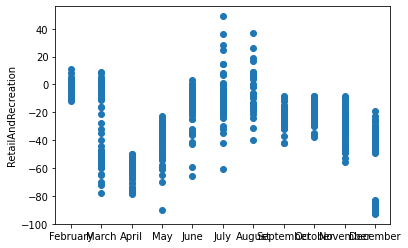

In [14]:
df_c = df.loc[df['sub_region_1']=='Çorum']
plt.scatter(df_c['Months'], df_c.iloc[:, 9])
plt.ylabel('RetailAndRecreation')

In [7]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=12)
km

KMeans(n_clusters=12)

In [8]:
df2 = df[['MonthIndex', 'retail_and_recreation_percent_change_from_baseline']]
predicted2 = km.fit_predict(df2[['MonthIndex', 'retail_and_recreation_percent_change_from_baseline']])
df2['clusters'] = predicted2
df2

C:\Users\alifi\AppData\Local\Temp/ipykernel_12384/2681688039.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['clusters'] = predicted2


,MonthIndex,retail_and_recreation_percent_change_from_baseline,clusters
2,2,2.0,1
2,2,16.0,6
2,2,2.0,1
2,2,-18.0,4
2,2,1.0,1
...,...,...,...
12,12,-31.0,0
12,12,-28.0,8
12,12,-14.0,4
12,12,-23.0,8


In [120]:
from sklearn.preprocessing import StandardScaler

df_r_scale = df2[['MonthIndex', 'retail_and_recreation_percent_change_from_baseline']]
scaler = StandardScaler()
scaler.fit(df_r_scale[["retail_and_recreation_percent_change_from_baseline"]])

StandardScaler()

In [121]:
df_r_scale['retail_and_recreation_percent_change_from_baseline'] = scaler.transform(df_r_scale['retail_and_recreation_percent_change_from_baseline'])

C:\Users\alifi\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[  2.  16.   2. ... -14. -23. -25.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [68]:
df_mean = df.groupby("Weekday").mean()
df_mean

,DayIndex,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
Weekday,,,,,,,
Monday,0.0,-23.297543,6.303377,12.357568,-23.786492,-22.888141,7.639291
Tuesday,1.0,-25.594772,4.311078,9.173928,-22.542718,-22.979971,8.040625
Wednesday,2.0,-26.010963,6.859351,11.183293,-22.738325,-21.622890,7.836988
Thursday,3.0,-25.078806,7.628873,14.783116,-24.007185,-21.990009,8.003592
Friday,4.0,-26.790627,8.823993,12.572076,-26.966634,-23.643343,9.245870
Saturday,5.0,-37.745177,-14.774060,-2.412752,-35.639891,-21.986158,10.136240
Sunday,6.0,-37.905035,-17.010266,8.746761,-33.422513,-18.527988,5.969445


In [54]:
df.loc[0]

,DayIndex,Weekday,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
Day Index,,,,,,,,,,,,,,,
0,0,Monday,TR,Turkey,Elazığ,Elâzığ Merkez,NaN,ChIJaxYxq7--dkARelqOvT6nkDs,2020-02-17,7.0,11.0,4.0,-12.0,5.0,1.0
0,0,Monday,TR,Turkey,Amasya,NaN,TR-05,ChIJYa1bkTECh0ARK8gVc9h_pqQ,2020-02-17,10.0,8.0,9.0,-5.0,8.0,-3.0
0,0,Monday,TR,Turkey,Aksaray,NaN,TR-68,ChIJFVWc0hVx1hQR2zZTrApp7KA,2020-02-17,5.0,4.0,-15.0,-14.0,9.0,0.0
0,0,Monday,TR,Turkey,Diyarbakır,NaN,TR-21,ChIJKYdkxsTtdEAR9PirLj3SNLE,2020-02-17,0.0,7.0,0.0,-8.0,7.0,1.0
0,0,Monday,TR,Turkey,Denizli,Pamukkale,NaN,ChIJJzvgvegTxxQRKAL3BqCxOfY,2020-02-17,14.0,10.0,14.0,-13.0,11.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,Monday,TR,Turkey,Gaziantep,Nizip,NaN,ChIJdYCR_oyFMRURTaai5af7BeE,2020-12-28,10.0,30.0,-1.0,-12.0,-10.0,9.0
0,0,Monday,TR,Turkey,Antalya,NaN,TR-07,ChIJs09LsqQrwBQRogQIK8fWlfI,2020-12-28,-41.0,-1.0,-28.0,-49.0,-26.0,11.0
0,0,Monday,TR,Turkey,Mardin,Artuklu,NaN,ChIJsWy6ANaLCkARhTGzvZB2R30,2020-12-28,-13.0,2.0,16.0,-27.0,-14.0,11.0


In [69]:
km2 = KMeans(n_clusters=7)
km2

KMeans(n_clusters=7)

In [70]:
df2 = df_mean[['DayIndex', 'retail_and_recreation_percent_change_from_baseline']]
predicted2 = km2.fit_predict(df2[['DayIndex', 'retail_and_recreation_percent_change_from_baseline']])
df2['clusters'] = predicted2
df2

C:\Users\alifi\AppData\Local\Temp/ipykernel_8000/2380466354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['clusters'] = predicted2


,DayIndex,retail_and_recreation_percent_change_from_baseline,clusters
Weekday,,,
Monday,0.0,-23.297543,2
Tuesday,1.0,-25.594772,6
Wednesday,2.0,-26.010963,3
Thursday,3.0,-25.078806,4
Friday,4.0,-26.790627,0
Saturday,5.0,-37.745177,5
Sunday,6.0,-37.905035,1


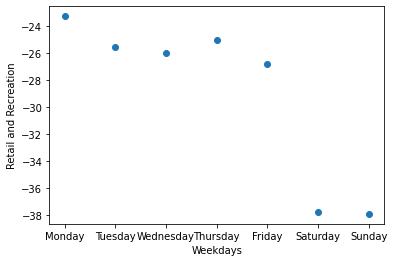

In [73]:

plt.scatter(df2.index, df2.iloc[:, 1])
plt.xlabel("Weekdays")
plt.ylabel("Retail and Recreation")
plt.show()

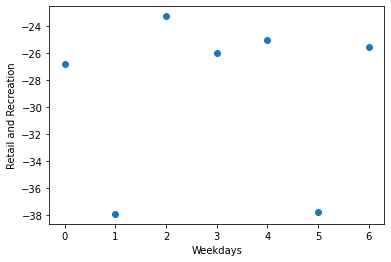

In [77]:
plt.scatter(df2.iloc[:, 2], df2.iloc[:, 1])
plt.xlabel("Weekdays")
plt.ylabel("Retail and Recreation")
plt.show()

In [50]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

km = KMeans(n_clusters=7)
km

KMeans(n_clusters=7)

In [51]:
df_retail = df[['DayIndex', 'Weekday', 'retail_and_recreation_percent_change_from_baseline']]
predicted = km.fit_predict(df_retail[['DayIndex', 'retail_and_recreation_percent_change_from_baseline']])
print(predicted)
df_retail

[1 1 1 ... 3 3 3]


,DayIndex,Weekday,retail_and_recreation_percent_change_from_baseline
Day Index,,,
0,0,Monday,7.0
0,0,Monday,10.0
0,0,Monday,5.0
0,0,Monday,0.0
0,0,Monday,14.0
...,...,...,...
6,6,Sunday,-91.0
6,6,Sunday,-86.0
6,6,Sunday,-92.0


In [52]:
df_retail['clusters'] = predicted
df_retail

C:\Users\alifi\AppData\Local\Temp/ipykernel_8000/3787925985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['clusters'] = predicted


,DayIndex,Weekday,retail_and_recreation_percent_change_from_baseline,clusters
Day Index,,,,
0,0,Monday,7.0,1
0,0,Monday,10.0,1
0,0,Monday,5.0,1
0,0,Monday,0.0,1
0,0,Monday,14.0,4
...,...,...,...,...
6,6,Sunday,-91.0,3
6,6,Sunday,-86.0,3
6,6,Sunday,-92.0,3


day len:  62398  retail len:  7203


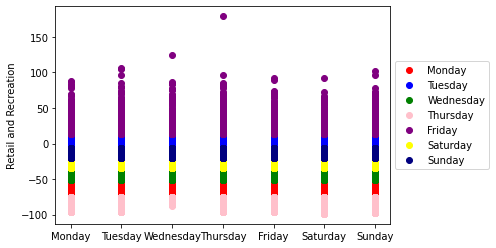

In [53]:
df_retail_day1 = df_retail[df_retail.clusters==0]
df_retail_day2 = df_retail[df_retail.clusters==1]
df_retail_day3 = df_retail[df_retail.clusters==2]
df_retail_day4 = df_retail[df_retail.clusters==3]
df_retail_day5 = df_retail[df_retail.clusters==4]
df_retail_day6 = df_retail[df_retail.clusters==5]
df_retail_day7 = df_retail[df_retail.clusters==6]
print("day len: ", len(df_retail.DayIndex), " retail len: ", len(df_retail_day1.retail_and_recreation_percent_change_from_baseline))
plt.scatter(df_retail_day1.Weekday, df_retail_day1.retail_and_recreation_percent_change_from_baseline, color='red', label='Monday')
plt.scatter(df_retail_day2.Weekday, df_retail_day2.retail_and_recreation_percent_change_from_baseline, color='blue', label='Tuesday')
plt.scatter(df_retail_day3.Weekday, df_retail_day3.retail_and_recreation_percent_change_from_baseline, color='green', label='Wednesday')
plt.scatter(df_retail_day4.Weekday, df_retail_day4.retail_and_recreation_percent_change_from_baseline, color='pink', label='Thursday')
plt.scatter(df_retail_day5.Weekday, df_retail_day5.retail_and_recreation_percent_change_from_baseline, color='purple', label='Friday')
plt.scatter(df_retail_day6.Weekday, df_retail_day6.retail_and_recreation_percent_change_from_baseline, color='yellow', label='Saturday')
plt.scatter(df_retail_day7.Weekday, df_retail_day7.retail_and_recreation_percent_change_from_baseline, color='navy', label='Sunday')
plt.ylabel('Retail and Recreation')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler

df_r_scale = df[['DayIndex', 'Weekday', 'retail_and_recreation_percent_change_from_baseline']]
df_r_scale.dropna(subset=['retail_and_recreation_percent_change_from_baseline'], inplace=True)
scaler = StandardScaler()
scaler.fit(df_r_scale[["retail_and_recreation_percent_change_from_baseline"]])

C:\Users\alifi\AppData\Roaming\Python\Python38\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


StandardScaler()

In [35]:
df_r_scale['retail_and_recreation_percent_change_from_baseline'] = scaler.transform(df_r_scale['retail_and_recreation_percent_change_from_baseline'])

C:\Users\alifi\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[  4.   5.  22. ... -77. -80. -82.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.